# Load annotations of AFW dataset from matlab file


## Import matlab utils from scipy

In [1]:
import numpy as np
from scipy.io.matlab import loadmat
import matplotlib.pyplot as plt
from PIL import Image

## The matlab file
The file is found on `annotations` folder of `Accuracy tool` for Face Detection  developed by M. Mathias, R. Benenson, M. Pedersoli, L. Van Gool, ECCV 2014 at [bitbutket](http://markusmathias.bitbucket.org/2014_eccv_face_detection/).

In [2]:
file_path = "new_annotations_AFW.mat"
# Load the file
ann_data = loadmat(file_path)['Annotations']
len(ann_data)

205

## Information about file

* `ann_data` contains `imgname`, `objects` which is a set of bounding boxes. 
* It contains the information of 205 images inside.


In [3]:
print(len(ann_data))
ann_data[:1]

205


array([[(array(['5002723411.jpg'], dtype='<U14'), array([[2301],
       [1530],
       [   3]]), array([[1407,  657, 1451,  705,    0,    1],
       [1327,  665, 1367,  719,    0,    1],
       [ 584,  359,  802,  579,    0,    0],
       [ 966,  468, 1172,  663,    0,    0],
       [1580,  606, 1792,  821,    0,    0]]), array([[0]]))]],
      dtype=[('imgname', 'O'), ('imgsize', 'O'), ('objects', 'O'), ('flags', 'O')])

## Loops to get image paths and bounding boxes

In [5]:
all_img_names = []
all_img_boxes = []

for i in range(len(ann_data)):
    img_name = ann_data[i]['imgname'][0][0]
    all_img_names.append(img_name)
    
    # a set of bounding boxes for this image
    img_bboxes = []
    items = ann_data[i]['objects'][0]
    for item in items:
        xmin = item[0]
        ymin = item[1]
        xmax = item[2]
        ymax = item[3]
        img_bboxes.append([xmin, ymin, xmax, ymax])
    
    all_img_boxes.append(img_bboxes)

all_img_boxes = np.array(all_img_boxes)
    

In [6]:
all_img_names[0]

'5002723411.jpg'

In [7]:
all_img_boxes[0]

[[1407, 657, 1451, 705],
 [1327, 665, 1367, 719],
 [584, 359, 802, 579],
 [966, 468, 1172, 663],
 [1580, 606, 1792, 821]]

## Check the result by visualization

In [8]:
def draw_bboxes(img, img_bboxes):
    plt.imshow(img)
    current_axis = plt.gca()
    
    # Draw the ground truth boxes in green
    for box in img_bboxes:
        xmin = box[0]
        ymin = box[1]
        xmax = box[2]
        ymax = box[3]
        current_axis.add_patch(plt.Rectangle((xmin, ymin), 
                                         xmax - xmin, ymax - ymin, 
                                         color='green', fill=False, linewidth=2))
                          
    plt.show()

In [9]:
# Read the image
img_path = '/Users/quanguet/Datasets/AFW/' + all_img_names[4]
img = Image.open(img_path)

# Get the bounding boxes
img_bboxes = all_img_boxes[4]

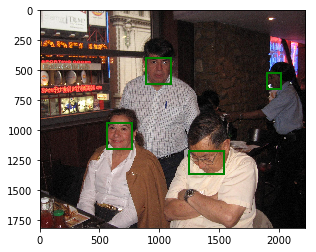

In [10]:
draw_bboxes(img, img_bboxes)

## Build the dataset file for Pytorch Model

* The file contains 205 lines in which each line represents for 1 image.

* Each line has the format:

```
img_name.jpg box1 box2 ... boxk
```
* Each box has the format:

```
xmin ymin xmax ymax label
```
For face detection, the `label` = `0` because we have only one label. 

In [11]:
afw_file = open('new_afw_file.txt', 'w')

In [12]:
for img_name, img_bboxes in zip(all_img_names, all_img_boxes):
    afw_file.write(img_name + ' ')
    
    for box in img_bboxes:
        # The bbox
        for val in box:
            afw_file.write(val.astype(str))
            afw_file.write(' ')
        # The label
        afw_file.write('0 ')
        
    afw_file.write('\n')

afw_file.close()

In [13]:
!head -2 new_afw_file.txt

5002723411.jpg 1407 657 1451 705 0 1327 665 1367 719 0 584 359 802 579 0 966 468 1172 663 0 1580 606 1792 821 0 
88094323.jpg 365 119 588 354 0 
